## Observations and Insights 

In [26]:
# Observations and Insights
# 1.) Treatment with Ramicane and Capomulin appear to be better than Ceftamin and Infubinol. More mice were 
#     tested on these two drug regimens compared to the other regimens.
# 2.) Higher Mouse weight coorresponds to greater tumor size.
# 3.) Gender balance was close, but not quite an even split. 

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import scipy.stats as st
import pandas as pd

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata = mouse_metadata.merge(study_results,on="Mouse ID")
mouse_metadata_df = pd.DataFrame(mouse_metadata)

# Display the data table for preview
#mouse_metadata_df.head(50)

In [28]:
# Checking the number of mice.
mouse_count1 = mouse_metadata_df["Mouse ID"].value_counts().count()
print(mouse_count1)

249


In [29]:
# Checking the number of rows.
mouse_count1b = mouse_metadata_df["Mouse ID"].count()
print(mouse_count1b)

1893


In [30]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_metadata_df['Timepoint'] = mouse_metadata_df['Timepoint'].astype(str)
mouse_metadata_dup_df = mouse_metadata_df[mouse_metadata_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
mouse_metadata_dup_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [31]:
# Optional: Get all the data for the duplicate mouse ID. 
print(mouse_metadata[mouse_metadata["Mouse ID"]=='g989'])

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g) Timepoint  \
908     g989     Propriva  Female          21          26         0   
909     g989     Propriva  Female          21          26         0   
910     g989     Propriva  Female          21          26         5   
911     g989     Propriva  Female          21          26         5   
912     g989     Propriva  Female          21          26        10   
913     g989     Propriva  Female          21          26        10   
914     g989     Propriva  Female          21          26        15   
915     g989     Propriva  Female          21          26        15   
916     g989     Propriva  Female          21          26        20   
917     g989     Propriva  Female          21          26        20   
918     g989     Propriva  Female          21          26        25   
919     g989     Propriva  Female          21          26        30   
920     g989     Propriva  Female          21          26        35   

     

In [32]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#mouse_metadata_df = mouse_metadata_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
mouse_metadata_df.drop(mouse_metadata_df[mouse_metadata_df['Mouse ID']=='g989'].index, inplace=True)
#mouse_metadata_df.dtypes

# Restore Timepoint to Int. 
mouse_metadata_df['Timepoint'] = mouse_metadata_df['Timepoint'].astype(int)
#mouse_metadata_df.count()

In [33]:
# Checking the number of mice in the clean DataFrame.
mouse_count2 = mouse_metadata_df["Mouse ID"].value_counts().count()
print(mouse_count2)

248


In [34]:
# Checking the revised number of rows.
mouse_count2b = mouse_metadata_df["Mouse ID"].count()
print(mouse_count2b)

1880


## Summary Statistics

In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#mouse_metadata_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].describe(include='all')
mouse_metadata_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<AxesSubplot:title={'center':'Total of Unique Mice tested per Drug Regimen'}, xlabel='Drug Regimens', ylabel='Number of Mice'>

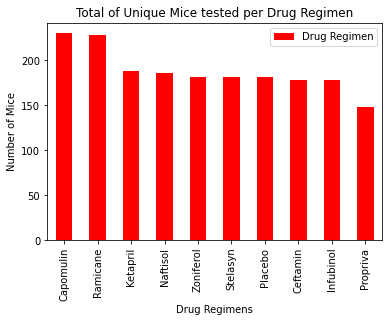

In [37]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas dataframe plot.
unique_mice_tested_df = pd.DataFrame(mouse_metadata_df["Drug Regimen"].value_counts())

unique_mice_tested_df.plot.bar(x=None,
                               y=None,
                               color="red",
                               title="Total of Unique Mice tested per Drug Regimen",
                               xlabel="Drug Regimens",
                               ylabel="Number of Mice")  

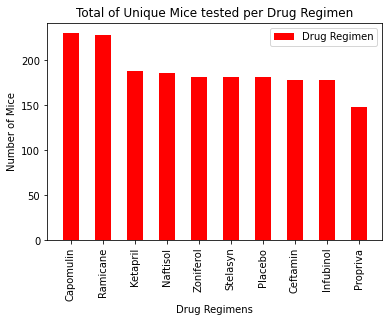

In [38]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
unique_mice_tested_df = pd.DataFrame(mouse_metadata_df["Drug Regimen"].value_counts())

unique_mice_tested_cnt = mouse_metadata_df["Drug Regimen"].value_counts()
x_axis = unique_mice_tested_cnt.index
plt.bar(x_axis, unique_mice_tested_cnt, width=0.5, color='r', alpha=1, align="center")

plt.xticks(x_axis, rotation='vertical')
plt.title('Total of Unique Mice tested per Drug Regimen')
plt.xlabel('Drug Regimens')
plt.ylabel('Number of Mice')
plt.legend(['Drug Regimen'])

<AxesSubplot:title={'center':'Gender of Mice in the Drug Regimen Study'}, ylabel='Sex'>

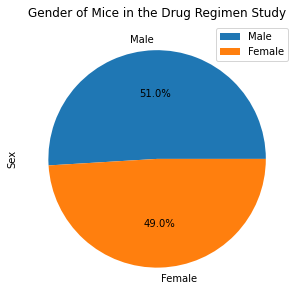

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender_df = pd.DataFrame(mouse_metadata_df["Sex"].value_counts())
#mice_gender_df

mice_gender_df.plot.pie(y='Sex', figsize=(5, 5), autopct='%1.1f%%', title='Gender of Mice in the Drug Regimen Study')

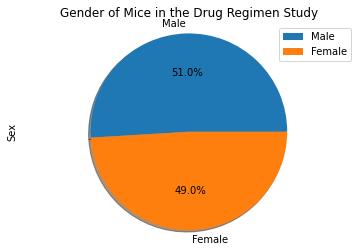

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#mice_gender_df = pd.DataFrame(mouse_metadata_df["Sex"].value_counts())
#mice_gender_df
mice_gender_cnt = mouse_metadata_df["Sex"].value_counts()

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = mice_gender_cnt.index
explode = (0, 0, 0)  # in this case, none are being "exploded". 

plt.pie(mice_gender_cnt, labels=labels, autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.ylabel('Sex')
plt.legend()
plt.title('Gender of Mice in the Drug Regimen Study')
plt.show()

## Quartiles, Outliers and Boxplots

In [41]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_metadata_tvol = mouse_metadata_df[mouse_metadata_df['Timepoint'] == mouse_metadata_df.groupby('Mouse ID')['Timepoint'].transform('max')]
#print(mouse_metadata_tvol)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_metadata_tvol_df = pd.DataFrame(mouse_metadata_tvol)
mouse_metadata_tvol_df["TVol"] = "Y"

indexNames = mouse_metadata_tvol_df[(mouse_metadata_tvol_df['Drug Regimen'] != 'Capomulin') & 
                                    (mouse_metadata_tvol_df['Drug Regimen'] != 'Ramicane') & 
                                    (mouse_metadata_tvol_df['Drug Regimen'] != 'Infubinol') & 
                                    (mouse_metadata_tvol_df['Drug Regimen'] != 'Ceftamin' )].index
mouse_metadata_tvol_df.count()
mouse_metadata_tvol_df.drop(indexNames, inplace=True)
mouse_metadata_tvol_df.head(100)

#drug_list = mouse_metadata_tvol_df['Drug Regimen'].unique().tolist()
#drug_list

#mouse_metadata_tvol2 = mouse_metadata_tvol_df["Tumor Volume (mm3)"]
#mouse_metadata_tvol2 = mouse_metadata_tvol2.sort_values()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,TVol
9,k403,Ramicane,Male,21,16,45,22.050126,1,Y
19,s185,Capomulin,Female,3,17,45,23.343598,1,Y
29,x401,Capomulin,Female,16,15,45,28.484033,0,Y
39,m601,Capomulin,Male,22,17,45,28.430964,1,Y
49,g791,Ramicane,Male,11,16,45,29.128472,1,Y
...,...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3,Y
1813,y163,Infubinol,Female,17,27,45,67.685569,3,Y
1845,y769,Ceftamin,Female,6,27,45,68.594745,4,Y
1855,y865,Ceftamin,Male,23,26,45,64.729837,3,Y


In [42]:
#  Split the df by Drug Regimen
tot_len = len(mouse_metadata_tvol_df.index)
mouse_metadata_tvol_df, mouse_tvol_infubinol_df = [x for tot_len, x in mouse_metadata_tvol_df.groupby(mouse_metadata_tvol_df["Drug Regimen"] == "Infubinol")]
mouse_tvol_infubinol_df.head()

tot_len = len(mouse_metadata_tvol_df.index)
mouse_metadata_tvol_df, mouse_tvol_ceftamin_df = [x for tot_len, x in mouse_metadata_tvol_df.groupby(mouse_metadata_tvol_df["Drug Regimen"] == "Ceftamin")]
mouse_tvol_ceftamin_df.head()

tot_len = len(mouse_metadata_tvol_df.index)
mouse_metadata_tvol_df, mouse_tvol_ramicane_df = [x for tot_len, x in mouse_metadata_tvol_df.groupby(mouse_metadata_tvol_df["Drug Regimen"] == "Ramicane")]
mouse_tvol_ramicane_df.head()

#tot_len = len(mouse_metadata_tvol_df.index)
#print(f"Length of Capomulin: {tot_len}")
#tot_len = len(mouse_tvol_ramicane_df.index)
#print(f"Length of Ramicane: {tot_len}")
#tot_len = len(mouse_tvol_ceftamin_df.index)
#print(f"Length of Ceftamin: {tot_len}")
#tot_len = len(mouse_tvol_infubinol_df.index)
#print(f"Length of Infubinol: {tot_len}")
#mouse_tvol_infubinol_df.head(50)
#mouse_metadata_tvol_df.head(50)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,TVol
9,k403,Ramicane,Male,21,16,45,22.050126,1,Y
49,g791,Ramicane,Male,11,16,45,29.128472,1,Y
59,s508,Ramicane,Male,1,17,45,30.276232,0,Y
74,m546,Ramicane,Male,18,16,45,30.564625,1,Y
84,z578,Ramicane,Male,11,16,45,30.638696,0,Y


In [43]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Capomulin
mouse_metadata_capmo = mouse_metadata_tvol_df["Tumor Volume (mm3)"]
mouse_metadata_capmo = mouse_metadata_capmo.sort_values()
quartiles = mouse_metadata_capmo.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"For Capomulin:")
print(f"The lower quartile of Mouse tumor volumes is: {lowerq}" )
print(f"The upper quartile of Mouse tumor volumes is: {upperq}" )
print(f"The interquartile range of Mouse tumor volumes is: {iqr}")
print(f"The median of the Mouse tumor volumes is: {quartiles[0.5]}" )
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.") 

For Capomulin:
The lower quartile of Mouse tumor volumes is: 32.37735684
The upper quartile of Mouse tumor volumes is: 40.1592203
The interquartile range of Mouse tumor volumes is: 7.781863460000004
The median of the Mouse tumor volumes is: 38.125164399999996
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [44]:
# Ramicane
mouse_metadata_ramic = mouse_tvol_ramicane_df["Tumor Volume (mm3)"]
mouse_metadata_ramic = mouse_metadata_ramic.sort_values()
quartiles = mouse_metadata_ramic.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"For Ramicane:")
print(f"The lower quartile of Mouse tumor volumes is: {lowerq}" )
print(f"The upper quartile of Mouse tumor volumes is: {upperq}" )
print(f"The interquartile range of Mouse tumor volumes is: {iqr}")
print(f"The median of the Mouse tumor volumes is: {quartiles[0.5]}" )

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.") 

For Ramicane:
The lower quartile of Mouse tumor volumes is: 31.56046955
The upper quartile of Mouse tumor volumes is: 40.65900627
The interquartile range of Mouse tumor volumes is: 9.098536719999998
The median of the Mouse tumor volumes is: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [45]:
# Ceftamin
mouse_metadata_cefta = mouse_tvol_ceftamin_df["Tumor Volume (mm3)"]
mouse_metadata_cefta = mouse_metadata_cefta.sort_values()
quartiles = mouse_metadata_cefta.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"For Ceftamin:")
print(f"The lower quartile of Mouse tumor volumes is: {lowerq}" )
print(f"The upper quartile of Mouse tumor volumes is: {upperq}" )
print(f"The interquartile range of Mouse tumor volumes is: {iqr}")
print(f"The median of the Mouse tumor volumes is: {quartiles[0.5]}" )

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.") 

For Ceftamin:
The lower quartile of Mouse tumor volumes is: 48.72207785
The upper quartile of Mouse tumor volumes is: 64.29983003
The interquartile range of Mouse tumor volumes is: 15.577752179999997
The median of the Mouse tumor volumes is: 59.85195552
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [46]:
# Infubinol
mouse_metadata_infub = mouse_tvol_infubinol_df["Tumor Volume (mm3)"]
mouse_metadata_infub = mouse_metadata_infub.sort_values()
quartiles = mouse_metadata_infub.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"For Infubinol:")
print(f"The lower quartile of Mouse tumor volumes is: {lowerq}" )
print(f"The upper quartile of Mouse tumor volumes is: {upperq}" )
print(f"The interquartile range of Mouse tumor volumes is: {iqr}")
print(f"The median of the Mouse tumor volumes is: {quartiles[0.5]}" )

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.") 

For Infubinol:
The lower quartile of Mouse tumor volumes is: 54.04860769
The upper quartile of Mouse tumor volumes is: 65.52574285
The interquartile range of Mouse tumor volumes is: 11.477135160000003
The median of the Mouse tumor volumes is: 60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


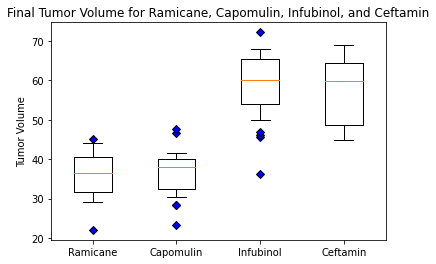

In [47]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()

blue_diamond = dict(markerfacecolor='b', marker='D')

ax1.set_title('Final Tumor Volume for Ramicane, Capomulin, Infubinol, and Ceftamin')
ax1.set_ylabel('Tumor Volume')
data = [mouse_metadata_ramic, mouse_metadata_capmo, mouse_metadata_infub, mouse_metadata_cefta]

# Whis was adjusted to display some of the outliers
bp = ax1.boxplot(data, whis = 0.5, showfliers=True, flierprops=blue_diamond)

ax1.set_xticklabels(['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin'])
#ax1.set_xticks([1,2,3,4])

plt.show()

## Line and Scatter Plots

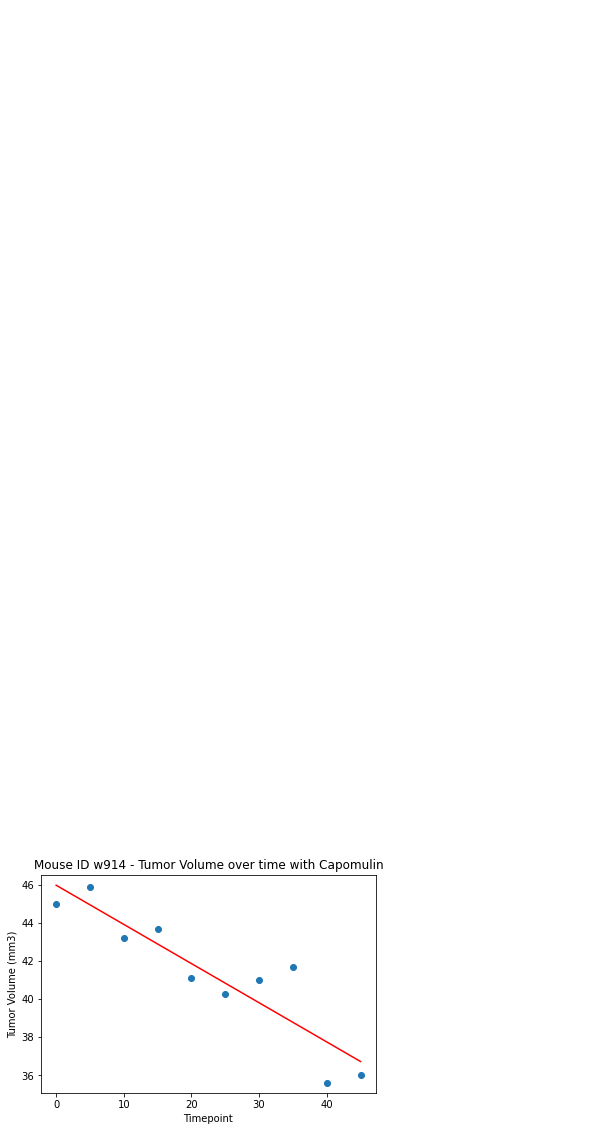

In [48]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

tot_len = len(mouse_metadata_df.index)
mouse_metadata_df2 = pd.DataFrame(mouse_metadata_df)
mouse_metadata_df2, mouse_capomulin_df = [x for tot_len, x in mouse_metadata_df2.groupby(mouse_metadata_df2["Mouse ID"] == "w914")]
mouse_capomulin_df.head(50)

x_values = mouse_capomulin_df['Timepoint']
y_values = mouse_capomulin_df['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,90),fontsize=50,color="red")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Mouse ID w914 - Tumor Volume over time with Capomulin")
plt.show()


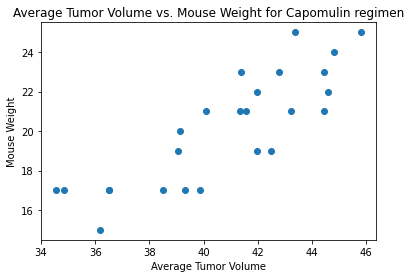

In [49]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

tot_len = len(mouse_metadata_df.index)
mouse_metadata_df2 = pd.DataFrame(mouse_metadata_df)

mouse_metadata_df2, mice_capomulin_df = [x for tot_len, x in mouse_metadata_df2.groupby(mouse_metadata_df2["Drug Regimen"] == "Capomulin")]
#mice_capomulin_df.head(50)

x_values = mice_capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
#x_values
y_values = mice_capomulin_df.groupby('Mouse ID')['Weight (g)'].unique()
#y_values

plt.scatter(x_values,y_values)
plt.xlabel('Average Tumor Volume')
plt.ylabel('Mouse Weight')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin regimen')
plt.show()


## Correlation and Regression

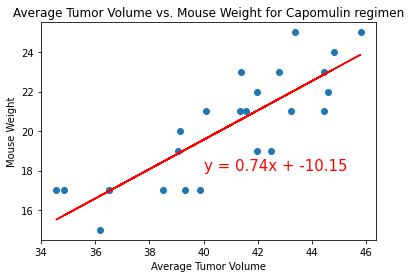

In [50]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Add the linear regression equation and line to plot

x_values = mice_capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
#x_values
y_values = mice_capomulin_df.groupby('Mouse ID')['Weight (g)'].unique()
y_values = np.array(y_values,float)
#y_values

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,18),fontsize=15,color="red")
plt.xlabel('Average Tumor Volume')
plt.ylabel('Mouse Weight')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin regimen')
plt.show()